In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder

In [26]:
train = pd.read_csv('train-new.csv')
test = pd.read_csv('test-new.csv')
train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,1,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,1,2001,1968,unavail,driver,0,76:40:01,3
2,55+,38.994,alive,none,none,1,f,2,2002,1994,unavail,driver,0,0.586122685,3
3,25-39,168.568,alive,airbag,belted,1,m,1,1998,1996,deploy,pass,1,09:17:01,3
4,Oct-24,27.751,alive,airbag,belted,0,m,1,2002,1997,nodeploy,pass,0,02:02:02,0


In [27]:
test.isnull().sum()[test.isnull().sum()!=0]

yearVeh    1
dtype: int64

In [28]:
test[test['yearVeh'].isnull()==True]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
1671,Oct-24,8521.81,alive,airbag,belted,1,m,1,1997,NaN,deploy,driver,1,0.554178241


### Observation:
    1. All cat data
    2. Not sure about the weights
    3. lots of cat columns to be converted to num
    4. Test column has 1 year veh empty
    5. Abcat & Deploy has same data, one of them can be removed
    6. case_id is not important as its just a unique value
    

##### Dvcat

We will start with dvcat column which is the speed but the data seems to be in incorrect formats

In [5]:
train['dvcat'].value_counts()

Oct-24     8645
25-39      5489
40-54      1968
55+         991
1-9km/h     472
Name: dvcat, dtype: int64

In [29]:
train['dvcat'][train['dvcat']=='1-9km/h']='1-9'
test['dvcat'][test['dvcat']=='1-9km/h']='1-9'

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
test['dvcat'].value_counts()

Oct-24    4203
25-39     2725
40-54     1009
55+        501
1-9        214
Name: dvcat, dtype: int64

We will convert them to num later before model building

In [31]:
train['caseid2'] = 0
train.head(2)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,caseid2
0,55+,53.342,dead,airbag,belted,1,f,1,2002,1997,deploy,driver,1,45:150:1,3,0
1,25-39,154.960,alive,none,none,1,m,1,2001,1968,unavail,driver,0,76:40:01,3,0


In [45]:
df = pd.DataFrame(train.caseid.value_counts())
df.head()

,caseid
0.54931713,13
0.595150463,12
0.604872685,12
0.590289352,12
0.610428241,11


In [49]:
train['caseid2'] = 0
train.head(2)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,caseid2
0,55+,53.342,dead,airbag,belted,1,f,1,2002,1997,deploy,driver,1,45:150:1,3,0
1,25-39,154.960,alive,none,none,1,m,1,2001,1968,unavail,driver,0,76:40:01,3,0


In [1]:
for i in train.index:
    train['caseid'][i] = train['caseid'].replace(train['caseid'][i], train['caseid'].value_counts())

NameError: name 'train' is not defined

In [71]:
fhjhfhd

45        45:214:1
46        82:801:2
47     0.560428241
48        13:54:01
49     0.137523148
50        48:115:1
51        43:205:1
52         73:99:1
53         43:99:1
54         49:86:1
55        49:33:01
56        08:58:01
57        47:132:1
58        02:46:01
59        43:159:2
60        42:137:1
61        43:222:1
62        41:37:01
63        76:47:02
64        49:132:1
65        04:54:04
66         72:68:2
67        13:29:01
68        43:218:1
69        08:12:01
70     0.434039352
71     0.422939815
72     0.260428241
73     0.534050926
74        45:48:01
75        11:04:02
76        48:48:01
77     0.568078704
78        49:170:2
79        49:273:2
80     0.129884259
81         75:88:1
82        45:45:02
83     0.659039352
84        41:501:1
85        41:51:01
86     0.609050926
87        45:45:01
88     0.710439815
89     0.634733796
90         74:71:1
91     0.638217593
92        49:06:01
93        81:22:02
94     0.628483796
95     0.583344907
96        41:173:2
97        45

In [53]:
train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,caseid2
0,55+,53.342,dead,airbag,belted,1,f,1,2002,1997,deploy,driver,1,45:150:1,3,0
1,25-39,154.960,alive,none,none,1,m,1,2001,1968,unavail,driver,0,76:40:01,3,0
2,55+,38.994,alive,none,none,1,f,2,2002,1994,unavail,driver,0,0.586122685,3,0
3,25-39,168.568,alive,airbag,belted,1,m,1,1998,1996,deploy,pass,1,09:17:01,3,0
4,Oct-24,27.751,alive,airbag,belted,0,m,1,2002,1997,nodeploy,pass,0,02:02:02,0,0


0       45:150:1
1       76:40:01
2    0.586122685
3       09:17:01
4       02:02:02
Name: caseid, dtype: object

##### Age

In [ ]:
train.ageOFocc.value_counts()

In [ ]:
sns.distplot(train.ageOFocc)

# Univariate analysis

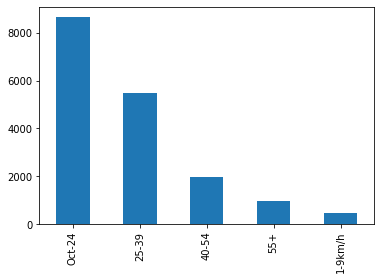

In [3]:
train['dvcat'].value_counts().plot(kind = 'bar')

In [ ]:
sns.distplot(train.weight)

In [ ]:
train['dead'].value_counts().plot(kind = 'bar')

In [ ]:
train['airbag'].value_counts().plot(kind = 'bar')

In [ ]:
train['seatbelt'].value_counts().plot(kind = 'bar')

In [ ]:
train['frontal'].value_counts().plot(kind = 'bar')

In [ ]:
train['sex'].value_counts().plot(kind = 'bar')

In [ ]:
train['yearacc'].value_counts().plot(kind = 'bar')

In [ ]:
#train['yearVeh'].value_counts().plot(kind = 'bar')

In [ ]:
train['abcat'].value_counts().plot(kind = 'bar')

In [ ]:
train['occRole'].value_counts().plot(kind = 'bar')

In [ ]:
train['deploy'].value_counts().plot(kind = 'bar')

In [ ]:
train['injSeverity'].value_counts().plot(kind = 'bar')

### Summary Univariate analysis:
    1. Most accidents are not on a very high speed, most of them were between 10-39
    2. Most cases are incapacity - means driver/pass is incapable to move.
    3. In most cases the airbag was deplyed
    4. Mostly teh driver is affected
    5. Most ppl dont have airbags - these could be the old cars. Also that is the reason teh airbag deployemnet is no in most cases.
    6. Females are slightly less to meet with an accident.
    7. Large number of accidents were frontal, more tahn 96% ppl are alive.

# Bivariate 

In [ ]:
plt.plot(pd.crosstab(train.dvcat, train.injSeverity))
plt.legend()

In [ ]:
pd.crosstab(train.dvcat, train.injSeverity)

In [ ]:
pd.crosstab(train.dead, train.injSeverity)

In [ ]:
pd.crosstab(train.airbag, train.injSeverity)

In [ ]:
pd.crosstab(train.seatbelt, train.injSeverity)

In [ ]:
pd.crosstab(train.frontal, train.injSeverity)

In [ ]:
pd.crosstab(train.sex, train.injSeverity)

In [ ]:
pd.crosstab(train.occRole, train.injSeverity)

### Obsevation:
    1. Most cases are of ppl driving in 10-24 which have not ot met with an accodent
    2. some cases between 10-24 and 25-39 have severity between incapability and some damage
    3. there is only 1 entry for severity level 6 - 

In [9]:
test['yearVeh'] = test['yearVeh'].fillna(1983)

In [10]:
train['car_Age'] = train['yearacc']-train['yearVeh']
test['car_Age'] = test['yearacc']-test['yearVeh']

In [11]:
cat_cols = ['dvcat', 'dead', 'airbag', 'seatbelt', 'sex',
        'abcat', 'occRole', 'deploy']

In [12]:
train.columns

Index(['dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'caseid', 'injSeverity', 'car_Age'],
      dtype='object')

In [13]:
#LR
lr = LabelEncoder()
for i in cat_cols:
    train[i]= lr.fit_transform(train[i])

In [14]:
#LR
lr = LabelEncoder()
for i in cat_cols:
    test[i]= lr.fit_transform(test[i])

In [15]:
train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,car_Age
0,3,53.342,1,0,0,1,0,1,2002,1997,0,0,1,45:150:1,3,5
1,1,154.960,0,1,1,1,1,1,2001,1968,2,0,0,76:40:01,3,33
2,3,38.994,0,1,1,1,0,2,2002,1994,2,0,0,0.586122685,3,8
3,1,168.568,0,0,0,1,1,1,1998,1996,0,1,1,09:17:01,3,2
4,4,27.751,0,0,0,0,1,1,2002,1997,1,1,0,02:02:02,0,5


In [ ]:
train.shape, test.shape

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = (Q3-Q1)
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
Q1,Q3 = np.percentile(train.weight , [25,75])
IQR = (Q3-Q1)

In [ ]:
L = Q1-(1.5 * IQR)
U = Q3 + (1.5 * IQR)

In [ ]:
L,U

In [ ]:
train['weight1'] = train.weight
train['weight1'].dtypes
train.head()

In [ ]:
train['weight1'] = train[train.weight1<844.8114999996028]
train.head()

In [ ]:
lowerbound,upperbound = outlier_treatment(train.weight)


In [ ]:
upperbound

In [ ]:
sns.distplot(train.weight)

In [ ]:
train.weight = train.drop(train[ (train.weight > upperbound) ].index )

In [ ]:
train.shape

In [ ]:
lowerbound1,upperbound1 = outlier_treatment(test.weight)

In [ ]:
test['weight'].head()

In [ ]:
sns.distplot(test.weight)

In [ ]:
for i in train['ageOFocc']:
    if i<25:
        train.iloc[i, 7] = 0


In [ ]:
for i in train['ageOFocc']:
    if (i>25):
        if i<50:
            train.iloc[i, 7] = 1

In [ ]:
train.head()

In [ ]:
train['Age'] = train['ageOFocc']
train.head()

In [ ]:
m = 0
n = 0
o = 0
p = 0

for i in train['Age']:
    if i>=25:
        if i<50:
            m = m+1
if m ==1:
    train['Age'][]

  


In [ ]:
for i in train['Age']:
    if i<25:
        n = n+1
 

In [ ]:
for i in train['Age']:
    if i>=50:
        if i<75:
            o = o+1
 

In [ ]:
for i in train['Age']:
    if i>75:
        p = p+1
 

In [24]:
mean = np.mean(train['weight'])
std = np.std(train['weight']) 
mean, std

(458.76301702248713, 1471.1065435409384)

In [25]:
threshold = 3
outlier = [] 
for i in train['weight']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print(outlier) 

[5059.919, 5546.196, 8328.641, 5565.271, 5104.425, 9582.681999999999, 8521.81, 9018.198, 5594.170999999999, 6496.298000000001, 15714.413999999999, 11007.107, 9392.593, 7859.733, 17431.68, 15459.64, 5400.107, 5530.119000000001, 47463.09, 10939.093, 25029.2, 24645.51, 13876.503999999999, 5508.496, 7567.991999999999, 8304.693000000001, 15411.506000000001, 7116.185, 6182.545, 18286.61, 7132.948, 7875.669, 7837.889, 8110.246999999999, 9863.368, 6793.629, 5020.274, 7042.505999999999, 7038.111, 5451.184, 5400.107, 15459.64, 6741.0, 7282.318, 6152.361, 17260.648, 4974.941, 7634.039000000001, 5363.936, 9807.896999999999, 7175.01, 6404.83, 5743.446, 14203.947, 23131.141, 12752.491000000002, 7767.869000000001, 9844.878, 15460.673999999999, 8313.314, 5678.255, 7850.656999999999, 7175.01, 7490.842, 5937.335, 8521.81, 13573.882, 7859.733, 5260.856, 6000.148, 9582.681999999999, 5092.96, 4959.875, 5852.274, 5852.274, 6155.61, 5062.498, 5093.224, 28281.109, 11793.01, 5382.67, 5093.224, 6553.50800000000

In [21]:
newtrain = train.drop(['caseid', 'yearacc', 'yearVeh','abcat' ], axis =1)
newtest = test.drop(['caseid', 'yearacc', 'yearVeh','abcat' ], axis =1)

In [22]:
X = newtrain.drop('injSeverity', axis = 1)
y = newtrain.injSeverity

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
import scipy.stats as stats
array = pd.crosstab(newtrain.occRole, newtrain.injSeverity)

# Apply Chi Square - chi2_Contingency
teststats, pvalue, dof, exp_freq = stats.chi2_contingency(array)

print(pvalue)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
train.weight.max()

In [ ]:
LR = LogisticRegression()
df_lr = LR.fit(X_train,y_train)
y_pred_lr = df_lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)
cm_lr = confusion_matrix(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))
print(acc_lr)
print(cm_lr)

In [ ]:
model_dte = DecisionTreeClassifier(random_state = 25)
model_dte.fit(X_train, y_train)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20),
    'min_samples_leaf': range(50, 100, 20),
    'min_samples_split': range(50, 200, 20),
    'criterion': ["entropy", 'gini']
}

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_dte, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
print("best accuracy", grid_search.best_score_)

grid_search.best_params_

In [ ]:
best_model_dte = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=8, 
                                  min_samples_leaf=50,
                                  min_samples_split=190)
best_model_dte.fit(X_train, y_train)
y_pred_bdte = best_model_dte.predict(X_test)
acc_bdte = accuracy_score(y_test, y_pred_bdte)
cm_bdte = confusion_matrix(y_test, y_pred_bdte)
print(classification_report(y_test, y_pred_bdte))
print(cm_bdte)
print(acc_bdte)
print(best_model_dte.score(X_train, y_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 
print(metrics.confusion_matrix(y_test, y_pred))
acc_r = metrics.accuracy_score(y_test,y_pred)
acc_r

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators =10)


In [32]:
# Defined the Xtrain and YTrain
X = newtrain.drop('injSeverity', axis = 1)
y = newtrain.injSeverity

# Fit and Predict
pred_GBR = gbcl.fit(X,y).predict(newtest)

# Export for submission

solution = pd.DataFrame({"injSeverity": pred_GBR})

# Export it in csv
solution.to_csv("GBCL4MODEL.csv", index = False)

In [ ]:
%%time
## GradientBoostingRegressor
gbcl_params={'n_estimators':np.arange(1,100)}
GS_GB=GridSearchCV(GBoost,gbcl_params,cv=10,scoring='neg_mean_squared_error')
GS_GB.fit(X,y)
GS_GB.best_params_